![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1545]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [1546]:
# Create variable & open
movie_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [1547]:
# Basic info about the movie_budgets file
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [1548]:
# Change budget, domestic gross & worldwide gross columns data types
# Remove comma
production_budget = movie_budgets.production_budget.str.replace(",", "")
domestic_gross = movie_budgets.domestic_gross.str.replace(",", "")
worldwide_gross = movie_budgets.worldwide_gross.str.replace(",", "")
production_budget
domestic_gross
worldwide_gross

0       $2776345279
1       $1045663875
2        $149762350
3       $1403013963
4       $1316721747
           ...     
5777             $0
5778        $240495
5779          $1338
5780             $0
5781        $181041
Name: worldwide_gross, Length: 5782, dtype: object

In [1549]:
# Now remove dollar sign
production_budget = production_budget.str.replace("$", "")
domestic_gross = domestic_gross.str.replace("$", "")
worldwide_gross = worldwide_gross.str.replace("$", "")
production_budget
domestic_gross
worldwide_gross

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: object

In [1550]:
# Change data type from object to float
production_budget = production_budget.astype(float)
domestic_gross = domestic_gross.astype(float)
worldwide_gross = worldwide_gross.astype(float)
production_budget
domestic_gross
worldwide_gross

0       2.776345e+09
1       1.045664e+09
2       1.497624e+08
3       1.403014e+09
4       1.316722e+09
            ...     
5777    0.000000e+00
5778    2.404950e+05
5779    1.338000e+03
5780    0.000000e+00
5781    1.810410e+05
Name: worldwide_gross, Length: 5782, dtype: float64

In [1551]:
# Calculate total_gross
total_gross = domestic_gross + worldwide_gross
total_gross

0       3.536853e+09
1       1.286728e+09
2       1.925247e+08
3       1.862020e+09
4       1.936903e+09
            ...     
5777    0.000000e+00
5778    2.889770e+05
5779    2.676000e+03
5780    0.000000e+00
5781    3.620820e+05
Length: 5782, dtype: float64

In [1552]:
# Calculate movie_profit
movie_profit = total_gross - production_budget
movie_profit

0       3.111853e+09
1       8.761278e+08
2      -1.574753e+08
3       1.531420e+09
4       1.619903e+09
            ...     
5777   -7.000000e+03
5778    2.829770e+05
5779   -2.324000e+03
5780   -1.400000e+03
5781    3.609820e+05
Length: 5782, dtype: float64

In [1553]:
# Create movie_budget dataframe 
movie_budget = {"original_title" : movie_budgets["movie"],
                "release_date" : movie_budgets['release_date'],
                "total_gross" : total_gross,
                "movie_profit" : movie_profit}
df_movie_budget = pd.DataFrame(movie_budget)
df_movie_budget

,original_title,release_date,total_gross,movie_profit
0,Avatar,"Dec 18, 2009",3.536853e+09,3.111853e+09
1,Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",1.286728e+09,8.761278e+08
2,Dark Phoenix,"Jun 7, 2019",1.925247e+08,-1.574753e+08
3,Avengers: Age of Ultron,"May 1, 2015",1.862020e+09,1.531420e+09
4,Star Wars Ep. VIII: The Last Jedi,"Dec 15, 2017",1.936903e+09,1.619903e+09
...,...,...,...,...
5777,Red 11,"Dec 31, 2018",0.000000e+00,-7.000000e+03
5778,Following,"Apr 2, 1999",2.889770e+05,2.829770e+05
5779,Return to the Land of Wonders,"Jul 13, 2005",2.676000e+03,-2.324000e+03
5780,A Plague So Pleasant,"Sep 29, 2015",0.000000e+00,-1.400000e+03


In [1554]:
# revisit movie_budgets
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [1555]:
# Convert the release_date field to type datetime object
df_movie_budget['release_date'] = pd.to_datetime(df_movie_budget['release_date'])

In [1556]:
# Add new column called release_month with only the month from the release_date
month =  [x.strftime('%B') for x in df_movie_budget['release_date']]
df_movie_budget['release_month'] = month

In [1557]:
# Caclulate profit by month
profit_vs_monthsum = df_movie_budget.groupby('release_month', sort=False, as_index=True)['movie_profit'].sum()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
profit_vs_monthsum = profit_vs_monthsum.reindex(new_order, axis=0).reset_index()
profit_vs_monthsum

,release_month,movie_profit
0,January,1.723547e+10
1,February,3.093380e+10
2,March,4.155941e+10
3,April,2.880441e+10
4,May,7.400512e+10
5,June,7.915562e+10
6,July,7.002402e+10
7,August,3.352490e+10
8,September,2.367912e+10
9,October,3.065286e+10


In [1558]:
profit_vs_monthmean = df_movie_budget.groupby('release_month', sort=False, as_index=True)['movie_profit'].mean()
profit_vs_monthmean = profit_vs_monthmean.reindex(new_order, axis=0).reset_index()
profit_vs_monthmean

,release_month,movie_profit
0,January,4.966995e+07
1,February,7.891276e+07
2,March,8.842428e+07
3,April,6.344583e+07
4,May,1.818308e+08
5,June,1.652518e+08
6,July,1.591455e+08
7,August,6.759052e+07
8,September,4.803067e+07
9,October,5.349540e+07


In [1559]:
profit_vs_month['release_month'] = pd.Categorical(profit_vs_month['release_month'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
profit_by_month

,release_month,movie_profit
4,January,1.723547e+10
3,February,3.093380e+10
7,March,4.155941e+10
0,April,2.880441e+10
8,May,7.400512e+10
6,June,7.915562e+10
5,July,7.002402e+10
1,August,3.352490e+10
11,September,2.367912e+10
10,October,3.065286e+10


In [1560]:
# Next Analysis 
foreign_gross = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
foreign_gross

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [1561]:
# Repeat steps- find out basic info about the foreign_gross file
foreign_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [1562]:
# Change budget, domestic gross, and worldwide gross columns data types
# Remove the comma
production_budget = foreign_gross.production_budget.str.replace(",", "")
domestic_gross = foreign_gross.domestic_gross.str.replace(",", "")
worldwide_gross = foreign_gross.worldwide_gross.str.replace(",", "")
production_budget
domestic_gross
worldwide_gross

0       $2776345279
1       $1045663875
2        $149762350
3       $1403013963
4       $1316721747
           ...     
5777             $0
5778        $240495
5779          $1338
5780             $0
5781        $181041
Name: worldwide_gross, Length: 5782, dtype: object

In [1563]:
# Remove the dollar sign
production_budget = production_budget.str.replace("$", "")
domestic_gross = domestic_gross.str.replace("$", "")
worldwide_gross = worldwide_gross.str.replace("$", "")
production_budget
domestic_gross
worldwide_gross

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: object

In [1564]:
# change data type from object to float
production_budget = production_budget.astype(float)
domestic_gross = domestic_gross.astype(float)
worldwide_gross = worldwide_gross.astype(float)
production_budget
domestic_gross
worldwide_gross

0       2.776345e+09
1       1.045664e+09
2       1.497624e+08
3       1.403014e+09
4       1.316722e+09
            ...     
5777    0.000000e+00
5778    2.404950e+05
5779    1.338000e+03
5780    0.000000e+00
5781    1.810410e+05
Name: worldwide_gross, Length: 5782, dtype: float64

In [1565]:
# calculate foreign_gross
foreign_gross_calc = worldwide_gross - domestic_gross 
foreign_gross_calc

0       2.015838e+09
1       8.046000e+08
2       1.070000e+08
3       9.440081e+08
4       6.965404e+08
            ...     
5777    0.000000e+00
5778    1.920130e+05
5779    0.000000e+00
5780    0.000000e+00
5781    0.000000e+00
Length: 5782, dtype: float64

In [1566]:
# create foreign_gross dataframe 
foreign_gross = {"original_title" : foreign_gross["movie"],
                "release_date" : foreign_gross['release_date'],
                "foreign_gross" : foreign_gross_calc,
                "domestic_gross" : domestic_gross}
df_foreign_gross = pd.DataFrame(foreign_gross)
df_foreign_gross

,original_title,release_date,foreign_gross,domestic_gross
0,Avatar,"Dec 18, 2009",2.015838e+09,760507625.0
1,Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",8.046000e+08,241063875.0
2,Dark Phoenix,"Jun 7, 2019",1.070000e+08,42762350.0
3,Avengers: Age of Ultron,"May 1, 2015",9.440081e+08,459005868.0
4,Star Wars Ep. VIII: The Last Jedi,"Dec 15, 2017",6.965404e+08,620181382.0
...,...,...,...,...
5777,Red 11,"Dec 31, 2018",0.000000e+00,0.0
5778,Following,"Apr 2, 1999",1.920130e+05,48482.0
5779,Return to the Land of Wonders,"Jul 13, 2005",0.000000e+00,1338.0
5780,A Plague So Pleasant,"Sep 29, 2015",0.000000e+00,0.0


In [1567]:
# Group FG & DG by months
# Caclulate profit by month
df_foreign_gross['release_date'] = pd.to_datetime(df_foreign_gross['release_date'])
df_foreign_gross

,original_title,release_date,foreign_gross,domestic_gross
0,Avatar,2009-12-18,2.015838e+09,760507625.0
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20,8.046000e+08,241063875.0
2,Dark Phoenix,2019-06-07,1.070000e+08,42762350.0
3,Avengers: Age of Ultron,2015-05-01,9.440081e+08,459005868.0
4,Star Wars Ep. VIII: The Last Jedi,2017-12-15,6.965404e+08,620181382.0
...,...,...,...,...
5777,Red 11,2018-12-31,0.000000e+00,0.0
5778,Following,1999-04-02,1.920130e+05,48482.0
5779,Return to the Land of Wonders,2005-07-13,0.000000e+00,1338.0
5780,A Plague So Pleasant,2015-09-29,0.000000e+00,0.0


In [1568]:
month =  [x.strftime('%B') for x in df_foreign_gross['release_date']]
df_foreign_gross['release_month'] = month

In [1569]:
fg_vs_month = df_foreign_gross.groupby('release_month', as_index=False)['foreign_gross','domestic_gross'].sum().sort_values(by='foreign_gross', ascending=False)
fg_vs_month

<ipython-input-1569-5f2681ad3f00>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fg_vs_month = df_foreign_gross.groupby('release_month', as_index=False)['foreign_gross','domestic_gross'].sum().sort_values(by='foreign_gross', ascending=False)


,release_month,foreign_gross,domestic_gross
2,December,4.141630e+10,3.434511e+10
8,May,3.889701e+10,2.714607e+10
9,November,3.769438e+10,2.827605e+10
6,June,3.673696e+10,3.153157e+10
5,July,3.530365e+10,2.672034e+10
7,March,1.976838e+10,1.812930e+10
0,April,1.479670e+10,1.240709e+10
10,October,1.434853e+10,1.399466e+10
1,August,1.428986e+10,1.595543e+10
3,February,1.416291e+10,1.388254e+10


In [1570]:
fg_vs_month['release_month'] = pd.Categorical(fg_vs_month['release_month'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
fg_by_month = fg_vs_month.sort_values("release_month")
fg_by_month

,release_month,foreign_gross,domestic_gross
4,January,7.847130e+09,8.310517e+09
3,February,1.416291e+10,1.388254e+10
7,March,1.976838e+10,1.812930e+10
0,April,1.479670e+10,1.240709e+10
8,May,3.889701e+10,2.714607e+10
6,June,3.673696e+10,3.153157e+10
5,July,3.530365e+10,2.672034e+10
1,August,1.428986e+10,1.595543e+10
11,September,1.160709e+10,1.141289e+10
10,October,1.434853e+10,1.399466e+10


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

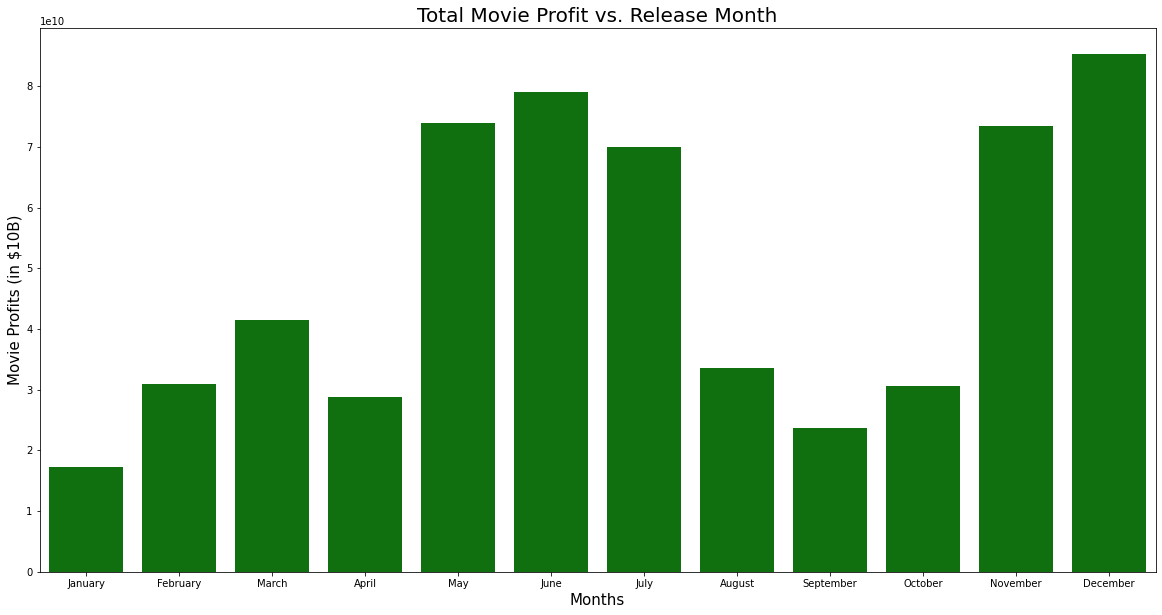

In [1571]:
# Here you run your code to model the data
# Plot profit vs month (bar chart) 

plt.figure(figsize=(20, 10))
sns.barplot(x = profit_vs_monthsum['release_month'],
            y = profit_vs_monthsum['movie_profit'],
            color = 'green')
plt.title("Total Movie Profit vs. Release Month", fontsize= 20)
plt.ylabel("Movie Profits (in $10B)", fontsize= 15)
plt.xlabel("Months", fontsize=15)

plt.savefig('TotalMovieProfitSum.jpg', dpi=300, bbox_inches='tight')

plt.show()

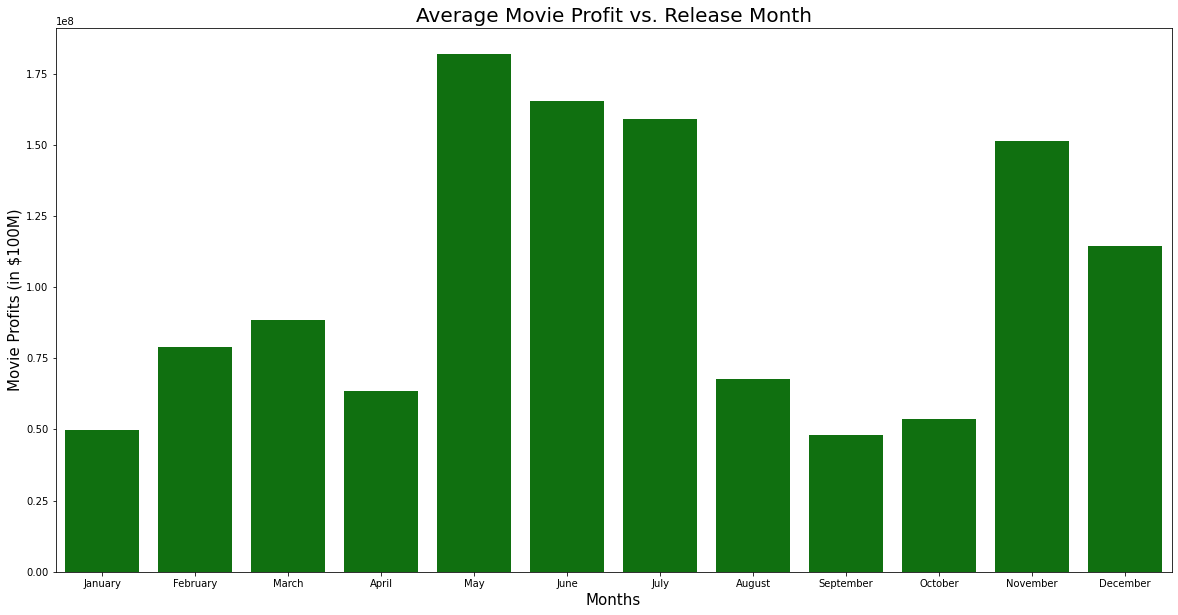

In [1572]:
# Here you run your code to model the data
# Plot profit vs month (bar chart) 

plt.figure(figsize=(20, 10))
sns.barplot(x = profit_vs_monthmean['release_month'],
            y = profit_vs_monthmean['movie_profit'],
            color = 'green')
plt.title("Average Movie Profit vs. Release Month", fontsize= 20)
plt.ylabel("Movie Profits (in $100M)", fontsize= 15)
plt.xlabel("Months", fontsize=15)
plt.savefig('TotalMovieProfitMean.jpg', dpi=300, bbox_inches='tight')

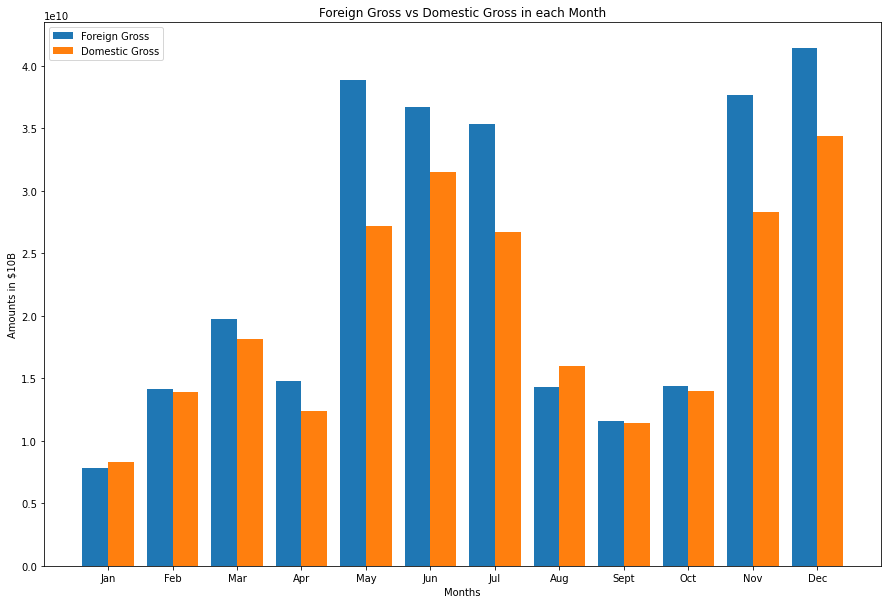

In [1575]:
# Replace XFG & ZDG & make double bar chart bigger 
# Add units on ylabel

X = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
XFG = [7.847130e+09,1.416291e+10,1.976838e+10,1.479670e+10,3.889701e+10,3.673696e+10,3.530365e+10,1.428986e+10,1.160709e+10,1.434853e+10,3.769438e+10,4.141630e+10]
ZDG = [8.310517e+09,1.388254e+10,1.812930e+10,1.240709e+10,2.714607e+10,3.153157e+10,2.672034e+10,1.595543e+10,1.141289e+10,1.399466e+10,2.827605e+10,3.434511e+10]

fig, ax = plt.subplots(figsize=(15,10))
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, XFG, 0.4, label = 'Foreign Gross')
plt.bar(X_axis + 0.2, ZDG, 0.4, label = 'Domestic Gross')
  
plt.xticks(X_axis, X)
plt.xlabel("Months")
plt.ylabel("Amounts in $10B")
plt.title("Foreign Gross vs Domestic Gross in each Month")
plt.legend()
plt.show()

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***